In [24]:
import numpy as np
import embedded_voting as ev
import matplotlib.pyplot as plt
from tqdm import tqdm
np.random.seed(42)
import copy

In [25]:
ratings_training = np.loadtxt("data_paper/ratings_base_case_training.csv",dtype=float,delimiter=",")
ratings_testing = np.loadtxt("data_paper/ratings_base_case_testing.csv",dtype=float,delimiter=",")

# Partie 1 : MLE

In [27]:
list_tol = [10**(-1.2-0.1*i) for i in range(7)]
l_train = len(list_tol)
n_trys = 10000
max_candidates = 50
n_candidates = 20
results_exp = np.zeros((2, l_train))

for i in range(l_train):
    tol = list_tol[i]
    
    list_agg = [ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleMLEGaussian(tol=tol)), name="MLE"),
                ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleMLEGaussian(tol=tol)), name="MLE+", default_train=False,default_add=False)]
    training = ratings_training[:35]
    _ = list_agg[1](training).winner_
    list_agg[1].train()
    
    for index_try in tqdm(range(n_trys)):
        
        list_agg[0].reset()
        
        truth = ratings_testing[0,max_candidates*index_try:max_candidates*index_try+n_candidates]
        ratings_candidates = ratings_testing[:35,max_candidates*index_try:max_candidates*index_try+n_candidates]


        ## training
        welfare = ev.RuleSumRatings()(ev.Ratings([truth])).welfare_
        # getting the results

        for k,agg in enumerate(list_agg):
            w = agg(ratings_candidates).winner_
            results_exp[k][i] += welfare[w]
            
results_exp_0 = results_exp

100%|██████████| 10000/10000 [00:49<00:00, 203.14it/s]


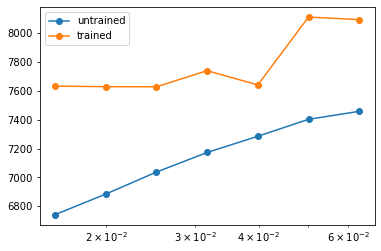

In [28]:
plt.plot(list_tol,results_exp_0[0],"o-", label="untrained")
plt.plot(list_tol, results_exp_0[1], "o-", label="trained")
plt.legend()
plt.xscale("log")
plt.savefig("mle3c.png")
plt.show()

# Partie 2 : EV

In [3]:
list_agg = [ev.Aggregator(rule=ev.RuleFastNash(), name="EV-1", 
                          embeddings_from_ratings=ev.EmbeddingsFromRatingsCorrelation(preprocess_ratings=ev.center_and_normalize, svd_factor=1)),
            ev.Aggregator(rule=ev.RuleFastNash(), name="EV-0.9", 
                          embeddings_from_ratings=ev.EmbeddingsFromRatingsCorrelation(preprocess_ratings=ev.center_and_normalize, svd_factor=0.9)),
            ev.Aggregator(rule=ev.RuleFastNash(), name="EV-0.7", 
                          embeddings_from_ratings=ev.EmbeddingsFromRatingsCorrelation(preprocess_ratings=ev.center_and_normalize, svd_factor=0.7)),
            ev.Aggregator(rule=ev.RuleFastNash(), name="EV-0.5", 
                          embeddings_from_ratings=ev.EmbeddingsFromRatingsCorrelation(preprocess_ratings=ev.center_and_normalize, svd_factor=0.5)),
            ev.Aggregator(rule=ev.RuleFastNash(), name="EV-0.3", 
                          embeddings_from_ratings=ev.EmbeddingsFromRatingsCorrelation(preprocess_ratings=ev.center_and_normalize, svd_factor=0.3)),
            ev.Aggregator(rule=ev.RuleFastNash(), name="EV-n+1", 
                          embeddings_from_ratings=ev.EmbeddingsFromRatingsCorrelation(preprocess_ratings=ev.center_and_normalize, svd_factor="div")),
            ev.Aggregator(rule=ev.RuleFastNash(), name="EV-PCA", 
                          embeddings_from_ratings=ev.EmbeddingsFromRatingsCorrelation(preprocess_ratings=ev.center_and_normalize, svd_factor="pca"))]

agg_names = [agg.name for agg in list_agg]

In [30]:
n_agg = len(list_agg)
list_train = [0,20,60,140,300,620,1260]
l_train = len(list_train)
max_candidates = 50
n_trys = 1000
n_candidates = 20
results_exp = np.zeros((n_agg, l_train))

for i in range(l_train):
    size_train = list_train[i]
    for agg in list_agg:
        agg.reset()
    if (size_train > 0):
        training = ratings_training[30:45,:size_train]
        for agg in list_agg:
            _ = agg(training).winner_
            agg.train()
        
    for index_try in tqdm(range(n_trys)):
        
        
    
        truth = ratings_testing[0,max_candidates*index_try:max_candidates*index_try+n_candidates]
        ratings_candidates = ratings_testing[30:45,max_candidates*index_try:max_candidates*index_try+n_candidates]


        ## training
        welfare = ev.RuleSumRatings()(ev.Ratings([truth])).welfare_
        # getting the results

        for k,agg in enumerate(list_agg):
            agg2 = copy.copy(agg)
            w = agg2(ratings_candidates).winner_
            results_exp[k][i] += welfare[w]
            
results_exp_4 = results_exp

100%|██████████| 1000/1000 [03:28<00:00,  4.81it/s]


In [31]:
r4 = results_exp_4/n_trys

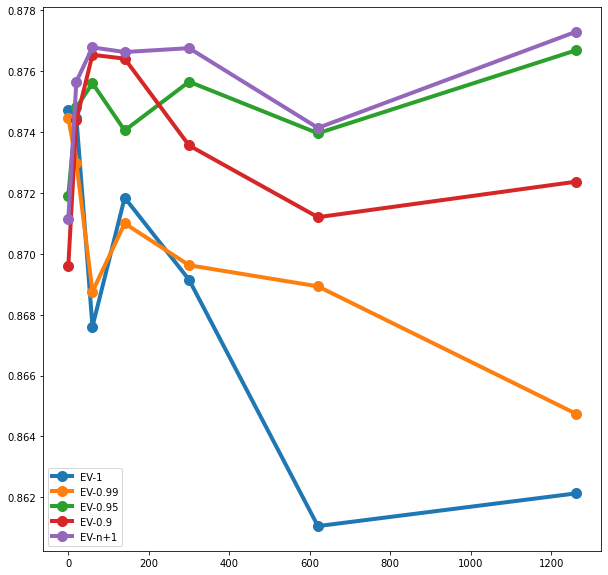

In [32]:
plt.figure(figsize=(10,10))
for i in range(len(list_agg)):
    plt.plot(list_train, r4[i], "o-", linewidth=4, markersize=10, label=agg_names[i])
    
plt.legend()
#plt.ylim(0.88,0.9)
plt.savefig("ev-15indep2.png")
plt.show()

# Partie 3 : EV part 2

In [33]:
n_candidates = 50
n_trys = 1000
default_group_noise = 10
n_training = 1000
default_indep_noise = 2

In [34]:
list_agg = [ev.Aggregator(rule=ev.RuleFastNash(), name="EV-1", 
                          embeddings_from_ratings=ev.EmbeddingsFromRatingsCorrelation(preprocess_ratings=ev.center_and_normalize, svd_factor=1)),
            ev.Aggregator(rule=ev.RuleFastNash(), name="EV-0.99", 
                          embeddings_from_ratings=ev.EmbeddingsFromRatingsCorrelation(preprocess_ratings=ev.center_and_normalize, svd_factor=0.99)),
            ev.Aggregator(rule=ev.RuleFastNash(), name="EV-0.95", 
                          embeddings_from_ratings=ev.EmbeddingsFromRatingsCorrelation(preprocess_ratings=ev.center_and_normalize, svd_factor=0.95)),
            ev.Aggregator(rule=ev.RuleFastNash(), name="EV-0.9", 
                          embeddings_from_ratings=ev.EmbeddingsFromRatingsCorrelation(preprocess_ratings=ev.center_and_normalize, svd_factor=0.9)),
            ev.Aggregator(rule=ev.RuleFastNash(), name="EV-n+1", 
                          embeddings_from_ratings=ev.EmbeddingsFromRatingsCorrelation(preprocess_ratings=ev.center_and_normalize, svd_factor="div"))]

agg_names = [agg.name for agg in list_agg]

In [36]:
n_agg = len(list_agg)
list_train = [0,20,60,140,300,620,1260]
l_train = len(list_train)
max_candidates = 50
n_trys = 1000
n_candidates = 20
results_exp = np.zeros((n_agg, l_train))

for i in range(l_train):
    size_train = list_train[i]
    groups_sizes = [1]*30
    features = np.eye(30)
    generator = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                          features, 
                                                          group_noise=default_group_noise, 
                                                          independent_noise=default_indep_noise,
                                                          center_gap=0, 
                                                          max_scale=1,
                                                          truth_generator=ev.TruthGeneratorUniform(seed=42),
                                                          group_noise_f=np.random.normal,
                                                          independent_noise_f=np.random.normal)
    
    tab_scores = generator(n_candidates*n_trys)
    tab_truth = generator.ground_truth_
    tab_scores = np.maximum(tab_scores, 0)
    for agg in list_agg:
        agg.reset()
    if (size_train > 0):
        training = generator(size_train)
        for agg in list_agg:
            _ = agg(training).winner_
            agg.train()
        
    for index_try in tqdm(range(n_trys)):
        
        
        ratings_candidates = tab_scores[::,index_try*n_candidates:(index_try+1)*n_candidates]
        truth = tab_truth[index_try*n_candidates:(index_try+1)*n_candidates]
        
        ## training
        welfare = ev.RuleSumRatings()(ev.Ratings([truth])).welfare_
        # getting the results

        for k,agg in enumerate(list_agg):
            agg2 = copy.copy(agg)
            w = agg2(ratings_candidates).winner_
            results_exp[k][i] += welfare[w]
            
results_exp_4 = results_exp

100%|██████████| 1000/1000 [10:34<00:00,  1.58it/s]


In [37]:
r4 = results_exp_4/n_trys

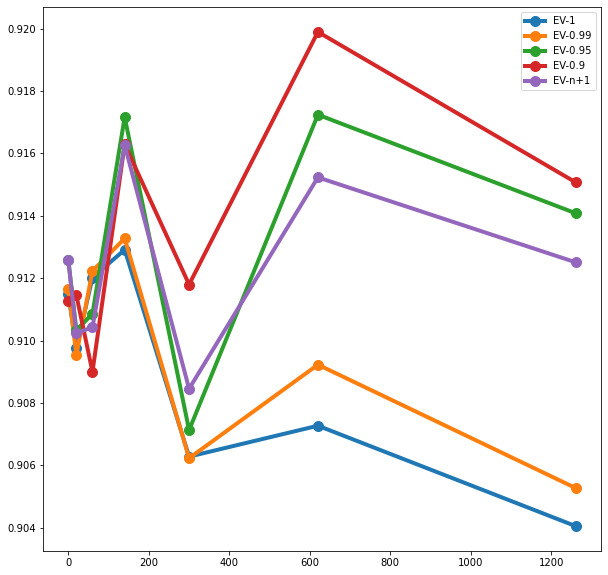

In [38]:
plt.figure(figsize=(10,10))
for i in range(len(list_agg)):
    plt.plot(list_train, r4[i], "o-", linewidth=4, markersize=10, label=agg_names[i])
    
plt.legend()
#plt.ylim(0.88,0.9)
plt.savefig("ev-099.png")
plt.show()